In [4]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('/content/data.csv')
#print(data.head())

In [6]:
missing_values = data.isnull().sum()
#print("Missing Values:\n", missing_values)

imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
#print("Missing Values After Imputation:\n", data_imputed.isnull().sum())

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_imputed), columns=data_imputed.columns)
#print("Data after scaling:\n", data_scaled.head())

data_scaled['total_microaneurysms'] = data_scaled[['ma1', 'ma2', 'ma3', 'ma4', 'ma5', 'ma6']].sum(axis=1)
data_scaled['total_exudates'] = data_scaled[['exudate1', 'exudate2', 'exudate3', 'exudate4', 'exudate5', 'exudate6', 'exudate7', 'exudate8']].sum(axis=1)

data_engineered = data_scaled.drop(['ma1', 'ma2', 'ma3', 'ma4', 'ma5', 'ma6', 'exudate1', 'exudate2', 'exudate3', 'exudate4', 'exudate5', 'exudate6', 'exudate7', 'exudate8'], axis=1)
#print("Data after feature engineering:\n", data_engineered.head())

In [7]:
X = data.drop(columns=['Class'])
y = data['Class']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
svm = SVC(kernel='linear', probability=True, random_state=42)

In [10]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_val_score(svm, X, y, cv=kfold, scoring='roc_auc')
print(f'Cross-Validated AUC-ROC (10-fold): {cv_results.mean():.2f}')

Cross-Validated AUC-ROC (10-fold): 0.83


In [12]:
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [15]:
y_pred = svm.predict(X_test)
y_pred_proba = svm.predict_proba(X_test)[:, 1]

In [16]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC-ROC Score: {roc_auc:.2f}')

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.75
Precision: 0.86
Recall: 0.66
F1 Score: 0.75
AUC-ROC Score: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.86      0.76       103
           1       0.86      0.66      0.75       128

    accuracy                           0.75       231
   macro avg       0.77      0.76      0.75       231
weighted avg       0.78      0.75      0.75       231



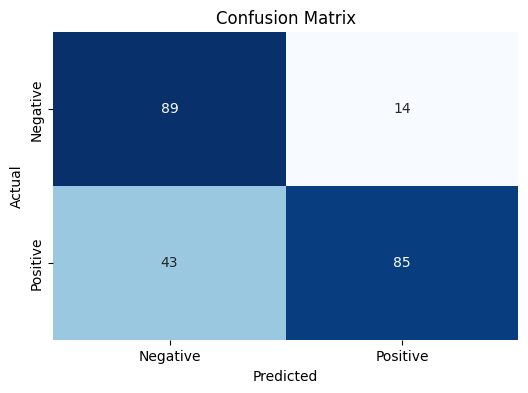

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

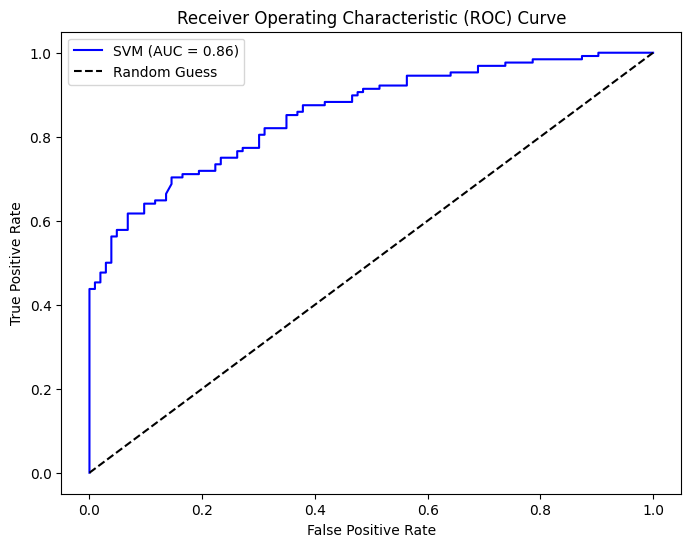

In [18]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'SVM (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()